In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [19]:
df = pd.read_csv('creditcard.csv')

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
X = df.drop(columns=['Class'], axis=1)
y=df['Class']

In [23]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
X_scaled = StandardScaler().fit_transform(X)

In [27]:
model = IsolationForest(n_estimators=500, contamination=0.001)

In [28]:
model.fit(X_scaled)

IsolationForest(contamination=0.001, n_estimators=500)

In [29]:
preds = model.predict(X_scaled)

In [35]:
np.unique(preds)

array([-1,  1])

In [37]:
preds = [1 if p == -1 else 0 for p in preds]

In [38]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.18      0.22       492

    accuracy                           1.00    284807
   macro avg       0.65      0.59      0.61    284807
weighted avg       1.00      1.00      1.00    284807



In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA()

In [41]:
comps = pca.fit_transform(X_scaled)

In [44]:
pca.explained_variance_ratio_

array([0.06527521, 0.05612313, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.01052982, 0.00140516])

In [48]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

<Axes: >

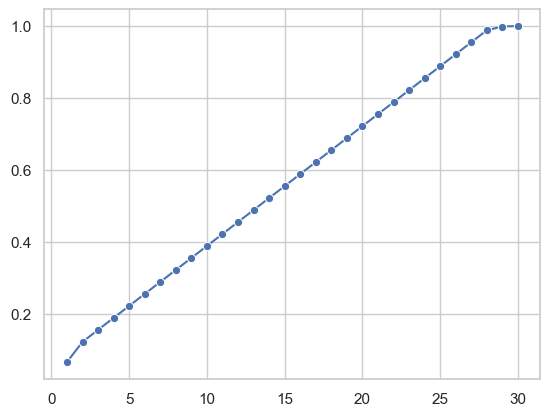

In [51]:
sns.set(style='whitegrid')
sns.lineplot(x=range(1,len(cumsum)+1), y=cumsum, marker='o')

In [52]:
pca = PCA(n_components=2)

In [53]:
n_comps = pca.fit_transform(X_scaled)

In [54]:
n_comps

array([[ 0.41663045, -2.53266428],
       [-0.39345348, -2.0773255 ],
       [ 1.86852545, -2.53349699],
       ...,
       [-0.19406338,  2.07078798],
       [-0.46608925,  1.22539363],
       [ 0.76759651,  1.90590292]], shape=(284807, 2))

<Axes: >

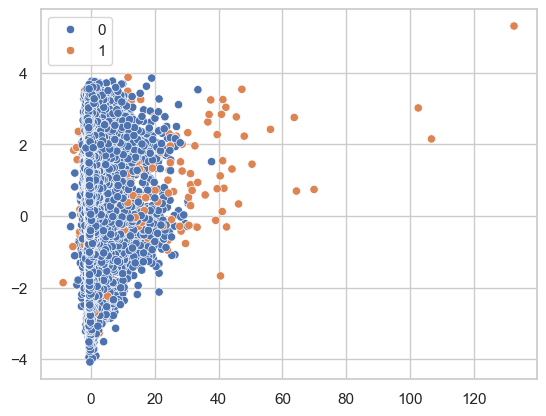

In [55]:
sns.scatterplot(x=n_comps[:,0], y=n_comps[:,1], hue=preds)